In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Read csv file and create initial panda
input_data="Working_ras.csv"
in1_df=pd.read_csv(input_data)
in1_df.head()

,Country,Population,Literacy,Schooling,Per_Cap_Inc_2017,GINI,Medical_Exp,Doctors,Hosp_Beds,Religion,Sect,Urbanization,Obseity,Infant_Mort,Mort_Under_5,Life_Exp
0,Afghanistan,38041754,31.7,10.0,2000,27.8,10.2,0.28,0.5,Muslim,Sunni,26.0,5.5,104.3,62.3,52.8
1,Albania,2880917,97.2,15.0,12500,29.0,6.7,1.20,2.9,Muslim,NaN,62.1,21.7,10.8,8.8,79.0
2,Algeria,43053054,75.1,14.0,15200,35.3,6.6,1.83,1.9,Muslim,Sunni,73.7,27.4,17.6,23.5,77.5
3,Angola,31825295,66.0,10.0,6800,42.7,2.9,0.21,0.8,Christian,Catholic,66.8,8.2,62.3,77.2,61.3
4,Argentina,44780677,99.1,18.0,20900,41.7,7.5,3.96,5.0,Christian,Catholic,92.1,28.3,9.0,9.9,77.8


In [3]:
# Compute Life Expectancy at 5  and add column to Panda
in_df=in1_df
m_u_5=in_df["Mort_Under_5"]
life_exp=in_df["Life_Exp"]
q5=m_u_5/1000
adj_le=round((life_exp-5)/(1-q5),1)
in_df["Adj_LE"]=adj_le

In [4]:
# Compute $ per person spent on medical and add as column to Panda plus add log of $ per person
pci=in_df["Per_Cap_Inc_2017"]
mxe=in_df["Medical_Exp"]
mx_dol=round(mxe*pci/100,0)
in_df["Mx"]=mx_dol
in_df["lnMx"]=np.log(mx_dol)
in_df['lnPCI']=np.log(pci)
in_df.head()

,Country,Population,Literacy,Schooling,Per_Cap_Inc_2017,GINI,Medical_Exp,Doctors,Hosp_Beds,Religion,Sect,Urbanization,Obseity,Infant_Mort,Mort_Under_5,Life_Exp,Adj_LE,Mx,lnMx,lnPCI
0,Afghanistan,38041754,31.7,10.0,2000,27.8,10.2,0.28,0.5,Muslim,Sunni,26.0,5.5,104.3,62.3,52.8,51.0,204.0,5.318120,7.600902
1,Albania,2880917,97.2,15.0,12500,29.0,6.7,1.20,2.9,Muslim,NaN,62.1,21.7,10.8,8.8,79.0,74.7,838.0,6.731018,9.433484
2,Algeria,43053054,75.1,14.0,15200,35.3,6.6,1.83,1.9,Muslim,Sunni,73.7,27.4,17.6,23.5,77.5,74.2,1003.0,6.910751,9.629051
3,Angola,31825295,66.0,10.0,6800,42.7,2.9,0.21,0.8,Christian,Catholic,66.8,8.2,62.3,77.2,61.3,61.0,197.0,5.283204,8.824678
4,Argentina,44780677,99.1,18.0,20900,41.7,7.5,3.96,5.0,Christian,Catholic,92.1,28.3,9.0,9.9,77.8,73.5,1568.0,7.357556,9.947504


In [12]:
# Drop Columns that are not numerical
nu_df=in_df.drop(["Country","Religion","Sect","Population"],axis=1)
nu_df.head()

,Literacy,Schooling,Per_Cap_Inc_2017,GINI,Medical_Exp,Doctors,Hosp_Beds,Urbanization,Obseity,Infant_Mort,Mort_Under_5,Life_Exp,Adj_LE,Mx,lnMx,lnPCI
0,31.7,10.0,2000,27.8,10.2,0.28,0.5,26.0,5.5,104.3,62.3,52.8,51.0,204.0,5.318120,7.600902
1,97.2,15.0,12500,29.0,6.7,1.20,2.9,62.1,21.7,10.8,8.8,79.0,74.7,838.0,6.731018,9.433484
2,75.1,14.0,15200,35.3,6.6,1.83,1.9,73.7,27.4,17.6,23.5,77.5,74.2,1003.0,6.910751,9.629051
3,66.0,10.0,6800,42.7,2.9,0.21,0.8,66.8,8.2,62.3,77.2,61.3,61.0,197.0,5.283204,8.824678
4,99.1,18.0,20900,41.7,7.5,3.96,5.0,92.1,28.3,9.0,9.9,77.8,73.5,1568.0,7.357556,9.947504


In [13]:
# Compute Correlation Matrix
cor_mat=nu_df.corr()
cor_mat

,Literacy,Schooling,Per_Cap_Inc_2017,GINI,Medical_Exp,Doctors,Hosp_Beds,Urbanization,Obseity,Infant_Mort,Mort_Under_5,Life_Exp,Adj_LE,Mx,lnMx,lnPCI
Literacy,1.000000,0.751806,0.508199,-0.185734,0.030920,0.672269,0.446776,0.574900,0.525455,-0.846553,-0.865505,0.758701,0.692145,0.483998,0.722828,0.741789
Schooling,0.751806,1.000000,0.620141,-0.305588,0.158586,0.700399,0.372809,0.659036,0.554874,-0.777080,-0.770365,0.770373,0.731961,0.664194,0.806073,0.779496
Per_Cap_Inc_2017,0.508199,0.620141,1.000000,-0.311431,0.071634,0.568113,0.258863,0.667905,0.513454,-0.598092,-0.570466,0.685037,0.682670,0.821804,0.809916,0.851777
GINI,-0.185734,-0.305588,-0.311431,1.000000,-0.193566,-0.486179,-0.305140,-0.096090,-0.073080,0.303813,0.331416,-0.402010,-0.405264,-0.327785,-0.291908,-0.284477
Medical_Exp,0.030920,0.158586,0.071634,-0.193566,1.000000,0.217014,0.225931,0.165853,0.179900,-0.093926,-0.093001,0.129717,0.128205,0.405749,0.321837,0.050209
Doctors,0.672269,0.700399,0.568113,-0.486179,0.217014,1.000000,0.530135,0.595930,0.510380,-0.713331,-0.703945,0.721102,0.688748,0.626830,0.736935,0.679467
Hosp_Beds,0.446776,0.372809,0.258863,-0.305140,0.225931,0.530135,1.000000,0.258115,0.187713,-0.417847,-0.389725,0.332381,0.291281,0.316346,0.417328,0.347319
Urbanization,0.574900,0.659036,0.667905,-0.096090,0.165853,0.595930,0.258115,1.000000,0.705046,-0.621365,-0.600820,0.685347,0.677202,0.601841,0.750368,0.756941
Obseity,0.525455,0.554874,0.513454,-0.073080,0.179900,0.510380,0.187713,0.705046,1.000000,-0.634698,-0.609979,0.594959,0.561351,0.473184,0.652337,0.640913
Infant_Mort,-0.846553,-0.777080,-0.598092,0.303813,-0.093926,-0.713331,-0.417847,-0.621365,-0.634698,1.000000,0.940899,-0.929538,-0.885751,-0.580594,-0.790867,-0.794024


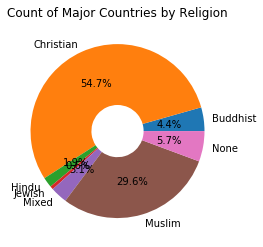

In [7]:
# pie plot religions by count


y=in_df.groupby(["Religion"]).size()

fig1, ax1=plt.subplots()
plt.title("Count of Major Countries by Religion")
plt.pie(y,labels=y.index,wedgeprops=dict(width=.7),autopct='%2.1f%%')
plt.show()


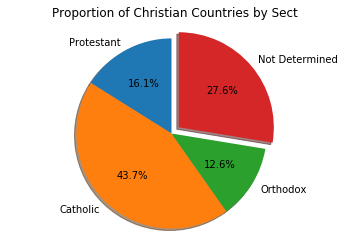

In [8]:
# Get religous sects
sun_ct=0
shi_ct=0
mus_ct=0
pro_ct=0
cat_ct=0
ort_ct=0
chr_ct=0

for index, row in in_df.iterrows():
    rel=in_df.iloc[index,9]
    sect=in_df.iloc[index,10]
    if rel=="Muslim":
        if in_df.iloc[index,10]=="Sunni":
            sun_ct+=1
        elif in_df.iloc[index,10]=="Shia":
            shi_ct+=1
        else: 
            mus_ct +=1
    elif rel=="Christian":
        if in_df.iloc[index,10]=="Protestant":
            pro_ct+=1
        elif in_df.iloc[index,10]=="Catholic":
            cat_ct+=1
        elif in_df.iloc[index,10]=="Orthodox":
            ort_ct+=1
        else: 
            chr_ct +=1

# Pie plot of Christian sects

labels="Protestant","Catholic","Orthodox","Not Determined"            
sizes=[pro_ct,cat_ct,ort_ct,chr_ct]
explode=(0,0,0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels,autopct="%2.1f%%",shadow=True,startangle=90)
plt.title("Proportion of Christian Countries by Sect")
ax1.axis('equal')
plt.show()


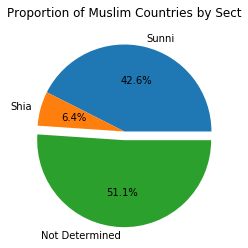

In [9]:
# Pie plot of Muslim sects

labels="Sunni","Shia","Not Determined"
sizes=[sun_ct,shi_ct,mus_ct]
explode=(0,0,.1)

fig1, ax1 = plt.subplots()
plt.title("Proportion of Muslim Countries by Sect")
ax1.pie(sizes,explode=explode,labels=labels,autopct="%2.1f%%")
plt.show()


Correlation : 0.0030159793175343194
Slope : -0.8272316703822421 and Intercept : 91.54959422976837


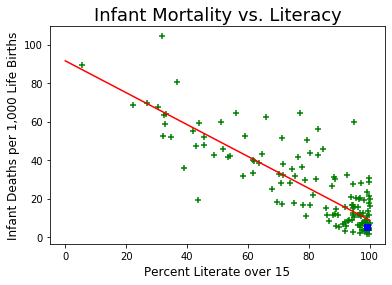

In [11]:
# Graph of Infant Mortality vs. Literacy
ind_var="Literacy"
dep_var="Infant_Mort"
plt.scatter(in_df[ind_var],in_df[dep_var],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')
plt.title("Infant Mortality vs. Literacy", size=18)
plt.xlabel("Percent Literate over 15", size = 12)
plt.ylabel("Infant Deaths per 1,000 Life Births",size=12)
print(f"Correlation : {cor_mat.iloc[0,9]}")
slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")
start=intercept
end=slope*100+intercept
plt.plot([0,100],[start,end],color='red')
plt.show()

# Infant mortality most correlated to Literacy (and education) followed by (per capita income) Adult life expectancy most correlated to (log per capita income & log medical spending) followed by level of education

In [ ]:
# Graph of Life Expectancy at 5 vs. Literacy
ind_var="Literacy"
dep_var="Adj_LE"
plt.scatter(in_df[ind_var],in_df[dep_var],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Adult Life Expectancy vs. Literacy", size=18)
plt.xlabel("Percent Literate over 15", size = 12)
plt.ylabel("Life Expectancy at Age 5",size=12)
print(f"Correlation : {cor_mat.iloc[0,12]}")
slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")
start=intercept
end=slope*100+intercept
plt.plot([0,100],[start,end],color='red')
plt.show()

In [ ]:
# histogram of schooling vs infant mortality
ind_var="Schooling"
dep_var="Infant_Mort"
plt.bar(in_df["Schooling"],in_df["Infant_Mort"])
plt.title("Infant Mortality vs. Schooling")
plt.ylabel("Infant Deaths per 1,000 Life Births")
print(f"Correlation : {cor_mat.iloc[1,9]}")
mask=~np.isnan(in_df[ind_var]) & ~np.isnan(in_df[dep_var])
slope=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).slope
intercept=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")

In [ ]:
# Histogram of LE at 5 vs schooling
ind_var="Schooling"
dep_var="Adj_LE"
plt.bar(in_df["Schooling"],in_df["Adj_LE"])
plt.title("Adult Life Expectancy vs. Schooling", size=18)
plt.ylim(40,100)
plt.ylabel("Life Expectancy for People Alive at Age 5", size =12)
plt.xlabel("Years of Schooling", size=12)
print(f"Correlation : {cor_mat.iloc[1,12]}")
mask=~np.isnan(in_df[ind_var]) & ~np.isnan(in_df[dep_var])
slope=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).slope
intercept=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")

In [ ]:
# Plot Per Cap Income vs Infant Mort
ind_var="Per_Cap_Inc_2017"
dep_var="Infant_Mort"
plt.scatter(in_df["Per_Cap_Inc_2017"],in_df["Infant_Mort"],color='g',marker='.')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Infant Mortality vs. Per Capita Income")
plt.ylabel("Infant Deaths per 1,000 Life Births")
print(f"Correlation : {cor_mat.iloc[2,9]}")
slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")

In [ ]:
# Plot per cap income vs LE at 5
ind_var="Per_Cap_Inc_2017"
dep_var="Adj_LE"
plt.scatter(in_df["Per_Cap_Inc_2017"],in_df["Adj_LE"],color='purple',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Adult Life Expectancy vs. Per Capita Income\n", size=15)
plt.ylabel("Life Expectancy for People Alive at Age 5", size=12)
plt.xlabel("Per Capita Income (US $)", size=12)
slope=st.linregress(np.log(in_df[ind_var]),in_df[dep_var]).slope
intercept=st.linregress(np.log(in_df[ind_var]),in_df[dep_var]).intercept
x=np.arange(100,150000,100)
y=slope*np.log(x)+intercept
plt.plot(x,y,color='gold')
plt.show()
print(f"Correlation : {cor_mat.iloc[2,12]}")
print(f"Correlation of log: {cor_mat.iloc[15,12]}")
print(f"Slope : {slope} and Intercept : {intercept}")

In [ ]:
# Plot GINI vs Inf Mort
ind_var="GINI"
dep_var="Infant_Mort"
plt.scatter(in_df["GINI"],in_df["Infant_Mort"],color='b',marker='o')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='g',marker='s')

plt.title("Infant Mortality vs. GINI Index")
plt.ylabel("Infant Deaths per 1,000 Life Births")
print(f"Correlation : {cor_mat.iloc[3,9]}")
mask=~np.isnan(in_df[ind_var]) & ~np.isnan(in_df[dep_var])
slope=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).slope
intercept=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")
start=slope*22+intercept
end=slope*60+intercept
plt.plot([22,60],[start,end],color='red')
plt.show()

In [ ]:
# Plot GINI vs LE at 5
ind_var="GINI"
dep_var="Adj_LE"
plt.scatter(in_df["GINI"],in_df["Adj_LE"],color='b',marker='o')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='g',marker='s')

plt.title("Adult Life Expectancy vs. GINI Index\n", size=15)
plt.ylabel("Life Expectancy for People Alive at Age 5",size=12)
plt.xlabel("GINI Index",size=12)
print(f"Correlation : {cor_mat.iloc[3,12]}")
mask=~np.isnan(in_df[ind_var]) & ~np.isnan(in_df[dep_var])
slope=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).slope
intercept=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")
start=slope*22+intercept
end=slope*60+intercept
plt.plot([22,60],[start,end],color='red')
plt.show()

In [ ]:
# Plot % Med Exp vs Inf Mort
ind_var="Medical_Exp"
dep_var="Infant_Mort"
plt.scatter(in_df["Medical_Exp"],in_df["Infant_Mort"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Infant Mortality vs. Medical Expenditures")
plt.ylabel("Infant Deaths per 1,000 Life Births")
print(f"Correlation : {cor_mat.iloc[4,9]}")
slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")

In [ ]:
# Plot % Medical Exp vs LE at 5
ind_var="Medical_Exp"
dep_var="Adj_LE"
plt.scatter(in_df["Medical_Exp"],in_df["Adj_LE"],color='r',marker='.')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Adult Life Expectancy vs. Medical Expenditures\n", size=18)
plt.ylabel("Life Expectancy for People Alive at Age 5",size=12)
plt.xlabel("Percent of GDP Spent as Medical Expenses", size=12)
print(f"Correlation : {cor_mat.iloc[4,12]}")
slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")

In [ ]:
# Plot Phys per 1K vs Inf Mort
ind_var="Doctors"
dep_var="Infant_Mort"
plt.scatter(in_df["Doctors"],in_df["Infant_Mort"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Infant Mortality vs. Physicians per 1,000\n",size=15)
plt.ylabel("Infant Deaths per 1,000 Life Births", size=12)
plt.xlabel("Number of Physicians per 1000 Population",size=12)
print(f"Correlation : {cor_mat.iloc[5,9]}")
slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")
start=slope*0+intercept
end=slope*4.5+intercept
plt.plot([0,4.5],[start,end],color='red')
plt.show()

In [ ]:
# Split the doctors into 3 equal sized bins based on size, then get x's and y's for each bin
cut_df=pd.qcut(in_df["Doctors"],3,labels=["lo","mid","hi"])
new_df=in_df
new_df["Rank"]=cut_df

new_df.head()

In [ ]:
#set up x and y
x1=[]
x2=[]
x3=[]
y1=[]
y2=[]
y3=[]
ini1=[0,0,0]

# Loop thru panda to get sets of x and y
for index, row in new_df.iterrows():
    rank=new_df.iloc[index,20]
    x=new_df.iloc[index,7]
    y=new_df.iloc[index,13]
    if rank=="lo":
        if ini1[0]==0:
            x1_min=x
            x1_max=x
            ini1[0]=1
            x1.append(x)
            y1.append(y)
        else:
            if x<x1_min:
                x1_min=x
            elif x>x1_max:
                x1_max=x
            x1.append(x)
            y1.append(y)
    elif rank=='mid':
        if ini1[1]==0:
            x2_min=x
            x2_max=x
            ini1[1]=1
            x2.append(x)
            y2.append(y)
        else:
            if x<x2_min:
                x2_min=x
            elif x>x2_max:
                x2_max=x
            x2.append(x)
            y2.append(y)
    else:
        if ini1[2]==0:
            x3_min=x
            x3_max=x
            ini1[2]=1
            x3.append(x)
            y3.append(y)
        else:
            if x<x3_min:
                x3_min=x
            elif x>x3_max:
                x3_max=x
            x3.append(x)
            y3.append(y)

In [ ]:
# Plot Doctors vs Infant Mort
ind_var="Doctors"
dep_var="Infant_Mort"
plt.scatter(in_df[ind_var],in_df[dep_var],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')
plt.title("Infant Mortality vs. Physicians per 1,000\n Piecewise Regression on 3 Equal Parts\n", size =15)
plt.ylabel("Life Expectancy for People Alive at Age 5", size =12)
plt.xlabel("No. of Physicians per 1000 Pop.", size =12)

# Plot each piece of the piecewise regression
slope1=st.linregress(x1,y1).slope
intercept=st.linregress(x1,y1).intercept
y1_min=x1_min*slope1+intercept
y1_max=x1_max*slope1+intercept
plt.plot([x1_min,x1_max],[y1_min,y1_max],color='r')

slope2=st.linregress(x2,y2).slope
intercept=st.linregress(x2,y2).intercept
y2_min=x2_min*slope2+intercept
y2_max=x2_max*slope2+intercept
plt.plot([x2_min,x2_max],[y2_min,y2_max],color='r')

slope3=st.linregress(x3,y3).slope
intercept=st.linregress(x3,y3).intercept
y3_min=x3_min*slope3+intercept
y3_max=x3_max*slope3+intercept
plt.plot([x3_min,x3_max],[y3_min,y3_max],color='r')
plt.show()

print(f'Slopes : {slope1}, {slope2}, {slope3}')

In [ ]:
# Plot doctors vs LE at 5
ind_var="Doctors"
dep_var="Adj_LE"
plt.scatter(in_df["Doctors"],in_df["Adj_LE"],color='b',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='r',marker='s')

plt.title("Adult Life Expectancy vs. Physicians per 1,000")
plt.ylabel("Life Expectancy for People Alive at Age 5")
plt.xlabel("No. of Physicians per 1000 Pop.")
print(f"Correlation : {cor_mat.iloc[6,9]}")
slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")

In [ ]:
ind_var="Hosp_Beds"
dep_var="Infant_Mort"
plt.scatter(in_df["Hosp_Beds"],in_df["Infant_Mort"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Infant Mortality vs. Hospital Beds per 1,000")
plt.ylabel("Infant Deaths per 1,000 Life Births")
print(f"Correlation : {cor_mat.iloc[6,9]}")
slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")

In [ ]:
ind_var="Hosp_Beds"
dep_var="Adj_LE"
plt.scatter(in_df["Hosp_Beds"],in_df["Adj_LE"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Adult Life Expectancy vs. Hospital Beds per 1,000")
plt.ylabel("Life Expectancy for People Alive at Age 5")
print(f"Correlation : {cor_mat.iloc[6,12]}")
slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")

In [ ]:
ind_var="Hosp_Beds"
dep_var="Adj_LE"
plt.scatter(in_df["Hosp_Beds"],in_df["Adj_LE"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Adult Life Expectancy vs. Hospital Beds per 1,000")
plt.ylabel("Life Expectancy for People Alive at Age 5")
z=np.polyfit(in_df[ind_var],in_df[dep_var],2)
x=np.arange(0,13,step=.05)
y=z[0]*x**2+z[1]*x+z[2]
plt.plot(x,y,color='r')

In [ ]:
# group by religion and print bar chart of average infant mortality by religion
rel_df=in_df.groupby(["Religion"]).mean()
rel_std=in_df.groupby(["Religion"]).std()
rel_im=rel_df["Infant_Mort"]
rel_im_std=rel_std["Infant_Mort"]
rel_al=rel_df["Adj_LE"]
rel_al_std=rel_std["Adj_LE"]
print(rel_im)
print(rel_im_std)
print(rel_al)
print(rel_al_std)

# once larger sample, look at box and whisker plot

In [ ]:
# Loop through each religion, get data points, determine IQR and points outside IQR for each
# Also set up list of lists for plotting box and whisker plot
plot_list=[]
religions=in_df["Religion"].unique()
for faith in religions:
    plot_points=in_df[in_df["Religion"]==faith]["Adj_LE"].to_list()
    low_end=np.median(plot_points)-1.5*st.iqr(plot_points)
    hi_end=np.median(plot_points)+1.5*st.iqr(plot_points)
    plot_list.append(plot_points)
    ol_list=[]
    for pt in plot_points:
            if (pt<low_end) or (pt>hi_end):
                ol_list.append(pt)
    # Print output
    print(f"\nFor {faith}, there are {len(plot_points)} point and there are {len(ol_list)} outliers.")
    if ((len(ol_list))>0):
        print(f"The outliers are : {ol_list}")# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Plot the box and whisker plot for this regimen
# Set up labels
fig1, ax1 = plt.subplots()
ax1.set_title('1.5 IQR of Adult Life Expectancy by Religion', size=18)
ax1.set_ylabel('Life Expectancy at Age 5', size =12)
ax1.set_xlabel('Religion', size=12)

bp=plt.boxplot(plot_list, labels=religions)
plt.show()


In [ ]:
ind_var="Urbanization"
dep_var="Infant_Mort"
plt.scatter(in_df["Urbanization"],in_df["Infant_Mort"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Infant Mortality vs. Urbanization")
plt.ylabel("Infant Deaths per 1,000 Life Births")
plt.show()
print(f"Correlation : {cor_mat.iloc[7,9]}")
slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")

In [ ]:
ind_var="Urbanization"
dep_var="Adj_LE"
plt.scatter(in_df["Urbanization"],in_df["Adj_LE"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Adult Life Expectancy vs. Urbanization", size=15)
plt.ylabel("Life Expectancy for People Alive at Age 5", size =12)
plt.xlabel("Percent of Population Living in Urban Areas", size =12)
slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
start=slope*20+intercept
end=slope*90+intercept
plt.plot([20,90],[start,end],color='r')

plt.show()
print(f"Correlation : {cor_mat.iloc[7,12]}")
print(f"Slope : {slope} and Intercept : {intercept}")

In [ ]:
ind_var="Obseity"
dep_var="Infant_Mort"
plt.scatter(in_df["Obseity"],in_df["Infant_Mort"],color='g',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='b',marker='s')

plt.title("Infant Mortality vs. Obesity")
plt.ylabel("Infant Deaths per 1,000 Life Births")
plt.show()
print(f"Correlation : {cor_mat.iloc[8,9]}")
slope=st.linregress(in_df[ind_var],in_df[dep_var]).slope
intercept=st.linregress(in_df[ind_var],in_df[dep_var]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")


In [ ]:
ind_var="Obseity"
dep_var="Adj_LE"
plt.scatter(in_df["Obseity"],in_df["Adj_LE"],color='r',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150],color='g',marker='s')
plt.title("Adult Life Expectancy vs. Obesity\n",size=18)
plt.ylabel("Life Expectancy for People Alive at Age 5",size=12)
plt.xlabel("Percent of Population Obese",size=12)
print(f"Correlation : {cor_mat.iloc[8,12]}")
mask=~np.isnan(in_df[ind_var]) & ~np.isnan(in_df[dep_var])
slope=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).slope
intercept=st.linregress(in_df[ind_var][mask],in_df[dep_var][mask]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")
start=slope*0+intercept
end=slope*50+intercept
plt.plot([0,50],[start,end],color='b')
#plt.annotate('xy',(6,5),fontsize=15,color='red')

plt.show()

In [ ]:
# Graph of Life Expectancy at 5 vs. Funds Spent on Medical
ind_var="Mx"
dep_var="Adj_LE"
plt.scatter(in_df[ind_var],in_df[dep_var],color='b',marker='+')
plt.scatter(in_df[ind_var][150],in_df[dep_var][150], color="gold", marker='s')
plt.title("Adult Life Expectancy vs. Medical Expenditures",size=18)
plt.xlabel("Per Capita Medical Spending (US $)", size = 12)
plt.ylabel("Life Expectancy at Age 5",size=12)
print(f"Correlation : {cor_mat.iloc[13,12]}")
slope=st.linregress(np.log(in_df[ind_var]),in_df[dep_var]).slope
intercept=st.linregress(np.log(in_df[ind_var]),in_df[dep_var]).intercept
x=np.arange(30,10230,10)
y=slope*np.log(x)+intercept
plt.plot(x,y,color='red')
plt.show()